# 支撐向量機(Support Vector Machine)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

##### 設定我們有60個點，其中30個是圈圈，30個是叉叉

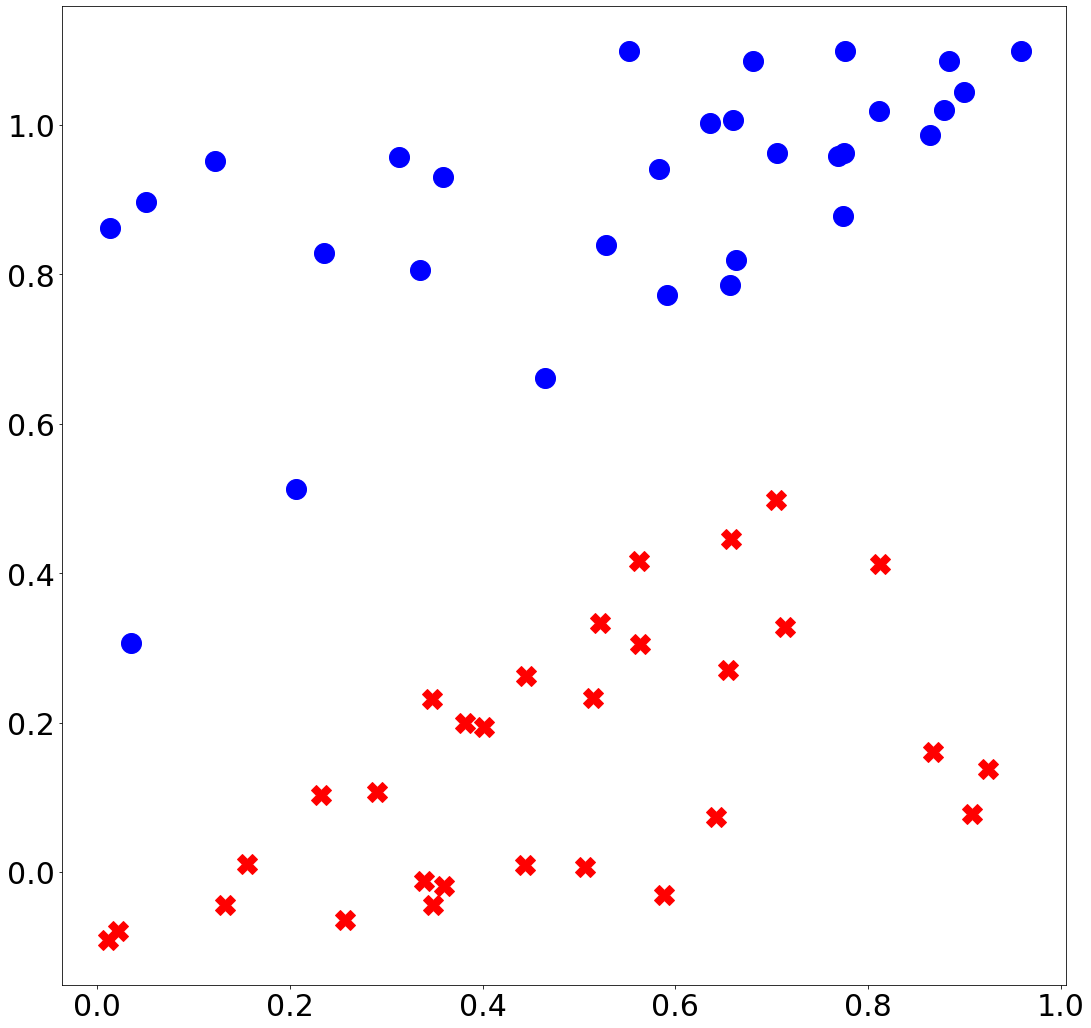

In [2]:
# 這裡我們建立一個60*2的矩陣x
# 60代表我們有60個點，2代表為2維空間(平面)
x=np.zeros((60,2))
# 這裡我們建立一個長度60的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(60)
# 因為有60筆資料，所以跑60個迴圈
for i in range(0,60): 
    # 標記y前半段0~29為圈圈(+1)，後半段30~59為叉叉(-1)
    # 也就是圈圈30個點，叉叉30個點
    f=0.1
    if(i<30):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)+f
    else:
        y[i]=-1
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
    # 這裡我們隨機給定我們資料的位置
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# 演算法

     pcost       dcost       gap    pres   dres
 0:  2.3926e+00  2.6963e+01  2e+02  2e+00  3e+01
 1:  1.6496e+01 -3.6716e+00  7e+01  8e-01  1e+01
 2:  2.5329e+01  1.3487e+01  3e+01  2e-01  3e+00
 3:  3.7665e+01  2.6301e+01  1e+01  4e-02  5e-01
 4:  3.7747e+01  2.9512e+01  1e+01  2e-02  2e-01
 5:  3.6583e+01  3.6095e+01  5e-01  5e-04  6e-03
 6:  3.6461e+01  3.6455e+01  6e-03  5e-06  7e-05
 7:  3.6460e+01  3.6460e+01  6e-05  5e-08  7e-07
 8:  3.6460e+01  3.6460e+01  6e-07  5e-10  7e-09
Optimal solution found.


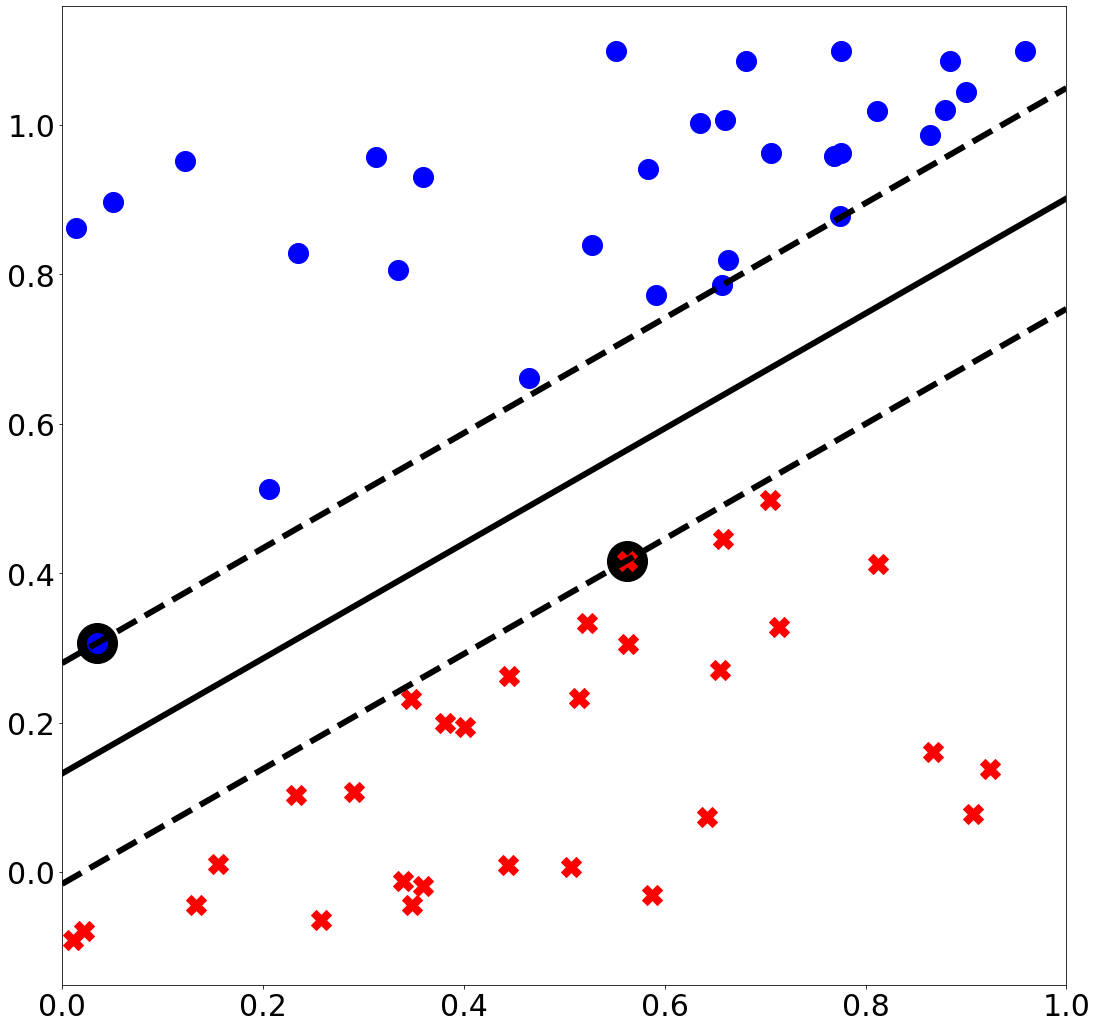

In [3]:
# 我們總共有60個點
n_samples=60
# 創建輸入矩陣new_x，其為[1,x0,x1]
new_x=np.ones((60,3))
new_x[:,1:3]=x
# 創建轉換到二次規劃中矩陣A的矩陣new_xx
# new_xx=y*new_x(可對照公式)
new_xx=np.ones((60,3))
for i in range(0,3):
    new_xx[:,i]=y*new_x[:,i]
# 建立二次規劃中的Q矩陣
QQ=np.diag(np.ones(3))
QQ[0,0]=0
Q=cvxopt.matrix(QQ)
# 建立二次規劃中的c矩陣
c=cvxopt.matrix(np.zeros(3))
# 建立二次規劃中的A矩陣
A = cvxopt.matrix(-new_xx)
# 建立二次規劃中的b矩陣
b = cvxopt.matrix(-np.ones(n_samples))

# 利用cvxopt套件求解
solution = cvxopt.solvers.qp(Q, c, A, b)
w=np.array(solution['x'])

# 找出藍色圈圈中的support vector
temp=100
up_index=0
for i in range(0,30):
    if(temp>abs(new_x[i,:].dot(w))):
        temp=abs(new_x[i,:].dot(w))
        up_index=i

# 找出紅色叉叉中的support vector
temp=100
low_index=0
for i in range(30,60):
    if(temp>abs(new_x[i,:].dot(w))):
        temp=abs(new_x[i,:].dot(w))
        low_index=i

# 繪圖
plt.rcParams["figure.figsize"] = (18,18)
# 標記support vector
plt.plot([x[up_index,0],x[low_index,0]],[x[up_index,1],x[low_index,1]],"ko",markersize=40)
# 畫出所有的數據點
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)
# 計算截距和斜率
m=-w[1]/w[2]
b=-w[0]/w[2]
# 計算margin line的截距
b_up=x[up_index,1]-m*x[up_index,0]
b_low=x[low_index,1]-m*x[low_index,0]
# 匯出margin line和分割線
plt.plot([0,1],[b,m+b],"k-",linewidth=6)
plt.plot([0,1],[b_up,m+b_up],"k--",linewidth=6)
plt.plot([0,1],[b_low,m+b_low],"k--",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([0,1])
plt.show()